In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

<Axes: >

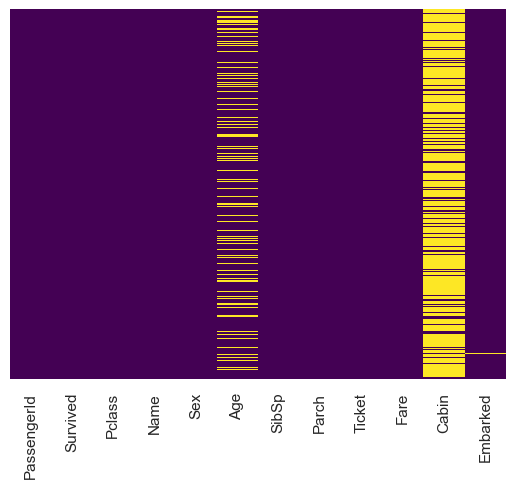

In [7]:
sns.heatmap(df.isnull() ,yticklabels=False , cbar = False , cmap = 'viridis')

In [8]:
df.duplicated().sum()

0

In [9]:
df[df['Embarked'].isnull().values]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: xlabel='Pclass', ylabel='Age'>

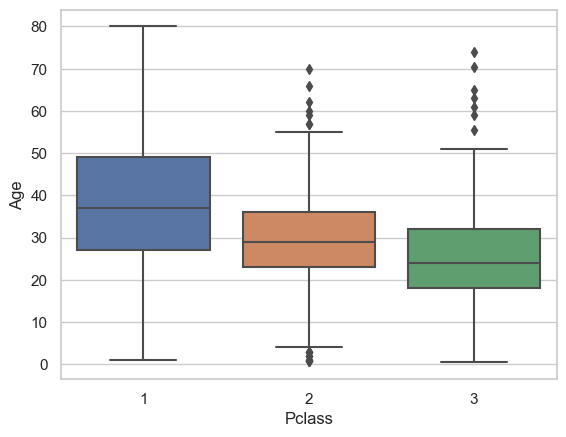

In [10]:
sns.boxplot(x='Pclass' ,  y='Age' , data = df)

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
             return 29
        else:
            return 24
    else :
        return Age

In [12]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis = 1)

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.drop('Cabin',axis= 1,inplace= True)

<Axes: >

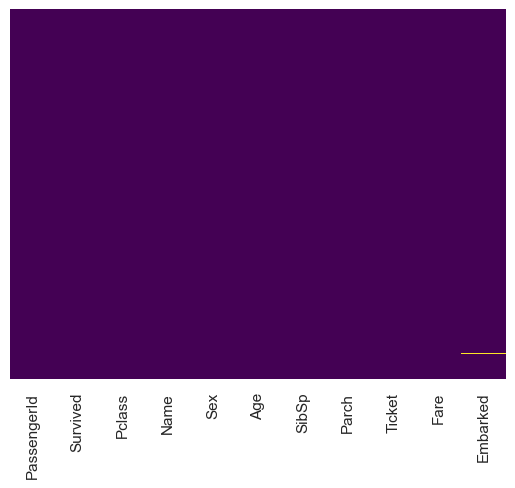

In [15]:
sns.heatmap(df.isna() ,yticklabels=False , cbar = False , cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

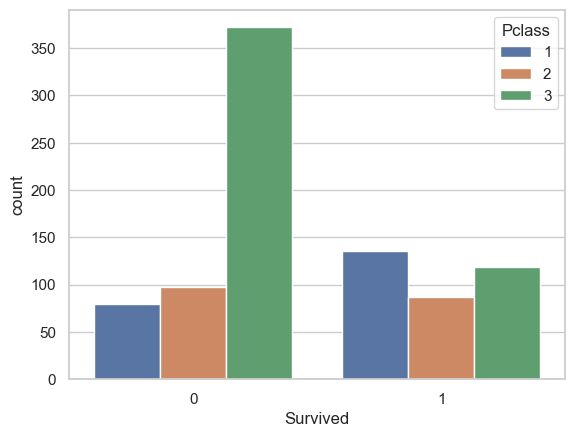

In [16]:
sns.countplot(data = df , x ='Survived' , hue = 'Pclass' )

<Axes: xlabel='Survived', ylabel='count'>

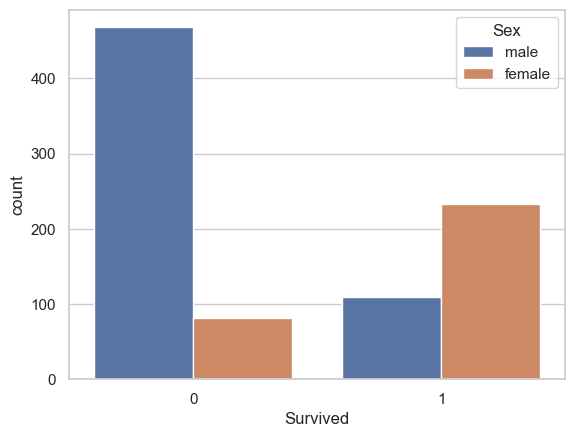

In [17]:
sns.countplot(data = df , x ='Survived' , hue = 'Sex' )

<Axes: xlabel='Pclass', ylabel='count'>

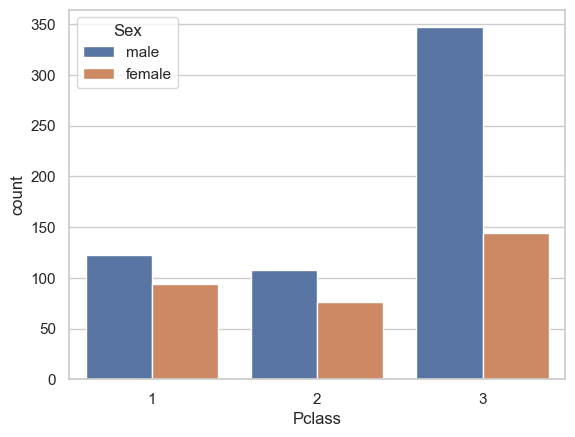

In [18]:
sns.countplot(data = df , x ='Pclass' , hue = 'Sex' )

In [19]:
df.loc[df['Age'].idxmax()]


PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Embarked                                          S
Name: 630, dtype: object

In [20]:
df.loc[df['Age'].idxmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Embarked                                     C
Name: 803, dtype: object

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
df['Fare'].max()

512.3292

In [23]:
df.iloc[df['Fare'].idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Embarked                      C
Name: 258, dtype: object

In [24]:
df.iloc[df['Fare'].idxmin()]

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                           36.0
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                           0.0
Embarked                         S
Name: 179, dtype: object

In [25]:
df.groupby('Pclass')['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

<Axes: ylabel='Fare'>

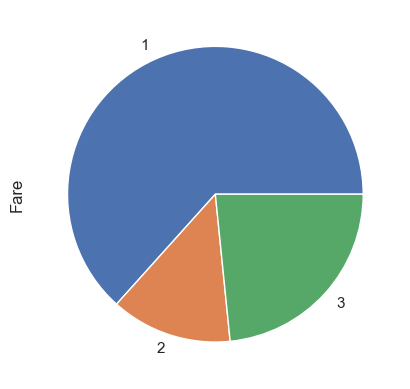

In [26]:
df.groupby('Pclass')['Fare'].sum().plot(kind='pie')